# Muffin vs Chihuahua

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import tensorflow as tf

In [8]:
from tensorflow.keras.utils import image_dataset_from_directory

In [9]:
train = image_dataset_from_directory("datasets/muffin-vs-chihuahua/train", image_size=(200, 200))
test = image_dataset_from_directory("datasets/muffin-vs-chihuahua/test", image_size=(200, 200))

Found 4733 files belonging to 2 classes.
Found 1184 files belonging to 2 classes.


In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

In [11]:
model = Sequential([
        Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(200, 200, 3)),
        MaxPooling2D((2, 2), strides=2),
        Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
        MaxPooling2D((2, 2), strides=2),
        Conv2D(16, (3,3), padding='same', activation=tf.nn.relu),
        MaxPooling2D((2, 2), strides=2),
        Dropout(0.5),
        Flatten(),
        Dense(128, activation=tf.nn.relu),
        Dense(6,  activation=tf.nn.softmax)
    ])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 100, 100, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 50, 50, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 25, 25, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 25, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,295,670 (4.94 MB)

 Trainable params: 1,295,670 (4.94 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [13]:
result = model.fit(train, validation_data = test, epochs=15)

Epoch 1/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 63s 416ms/step - accuracy: 0.5688 - loss: 19.4687 - val_accuracy: 0.7796 - val_loss: 0.4884
Epoch 2/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 64s 429ms/step - accuracy: 0.7649 - loss: 0.5010 - val_accuracy: 0.8235 - val_loss: 0.4193
Epoch 3/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 63s 426ms/step - accuracy: 0.7986 - loss: 0.4277 - val_accuracy: 0.8345 - val_loss: 0.3802
Epoch 4/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 64s 434ms/step - accuracy: 0.8192 - loss: 0.4149 - val_accuracy: 0.8471 - val_loss: 0.3687
Epoch 5/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 64s 432ms/step - accuracy: 0.8377 - loss: 0.3790 - val_accuracy: 0.8395 - val_loss: 0.3916
Epoch 6/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 64s 434ms/step - accuracy: 0.8440 - loss: 0.3571 - val_accuracy: 0.8598 - val_loss: 0.3635
Epoch 7/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 66s 443ms/step - accuracy: 0.8690 - loss: 0.3150 - val_accuracy: 0.8649 - val_loss: 0.3645
Epoch 8/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 66s 444ms/step - accuracy: 0.8730 - loss: 

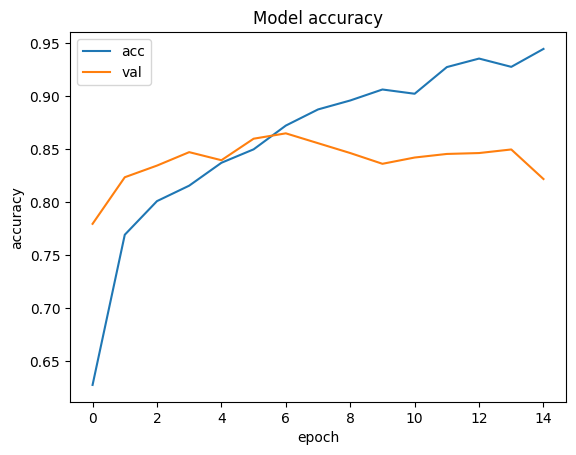

In [14]:
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val'], loc='upper left')
plt.show()

In [25]:
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image

def predict_image(model, image_path, target_size=(200, 200)):
    """
    Make a prediction on a single image using a trained model
    
    Args:
        model: Trained Keras model
        image_path: Path to the image file
        target_size: Expected input size for the model (height, width)
    
    Returns:
        Prediction result
    """
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=target_size)
    
    # Convert to array and expand dimensions for batch
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Normalize pixel values
    img_array = img_array / 255.0
    
    # Make prediction
    prediction = model.predict(img_array)
    
    return prediction

image_path = 'pictures/1.jpg'
prediction = predict_image(model, image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [27]:
class_labels = ['Chihuahua', 'Muffin']
predicted_class = class_labels[np.argmax(prediction)]
confidence = np.max(prediction)
print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2f}")

Predicted class: Chihuahua
Confidence: 0.48
